### Meal Event Exploration

* Distribution of start_to_peak, peak_to_end per patient
* Distribution of start_to_peak, peak_to_end per patient by morning ((0-12]) and afternoon [13-24]
* Distribution of peak_glucose
* Distribution of peak_glucose by time period
* Distribution of excursion_size
* Distribution of excursion_size by time period
* Distribution of excursion rate by time period

### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import os
import datetime
import calendar
import math
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import warnings; warnings.simplefilter('ignore')
import pydata_google_auth as pgauth
from google.cloud import bigquery
creds = pgauth.get_user_credentials(['https://www.googleapis.com/auth/cloud-platform'])

%matplotlib inline

/opt/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Distribution of start_to_peak, peak_to_end per patient

In [48]:
sql_script="""
SELECT
  pim_id,
  AVG(duration) as start_to_normal,
  AVG(time_to_peak) AS start_to_peak,
  AVG(TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE)) AS peak_to_end
FROM
  odp_level2_feature_store.meal_events
GROUP BY
  pim_id
"""

In [49]:
time=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [50]:
time.head()

,pim_id,start_to_normal,start_to_peak,peak_to_end
0,79808,161.236786,64.133192,97.103594
1,9273,157.916667,61.250000,96.666667
2,43958,162.355769,74.609375,87.746394
3,1278300,150.277778,62.638889,87.638889
4,1420086,168.395062,76.265432,92.129630


In [51]:
time.shape

(11407, 4)

In [52]:
time.isnull().sum()

pim_id             0
start_to_normal    0
start_to_peak      0
peak_to_end        0
dtype: int64

In [56]:
print(time.start_to_normal.min(),time.start_to_normal.max())

60.0 290.0


In [53]:
print(time.start_to_peak.min(),time.start_to_peak.max())

0.0 230.0


In [54]:
print(time.peak_to_end.min(),time.peak_to_end.max())

0.0 255.0


**start to normal**

In [57]:
time['start_to_normal'].median()

164.0625

In [58]:
time['start_to_normal'].std()

14.843431347854251

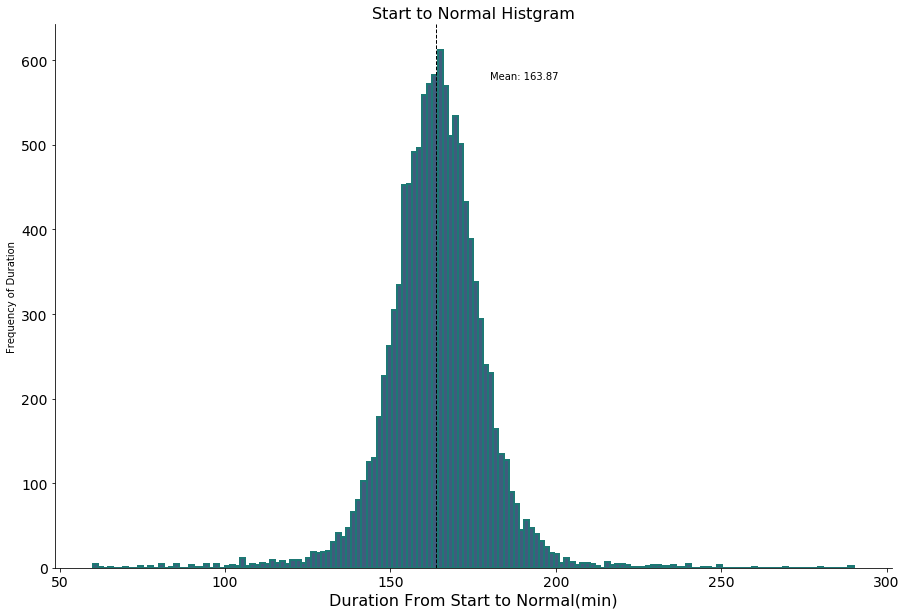

In [59]:
Days=time['start_to_normal']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Start to Normal Histgram', fontsize=16)
plt.xlabel('Duration From Start to Normal(min)', fontsize=16)
plt.ylabel('Frequency of Duration');

**start_to_peak**

In [14]:
time['start_to_peak'].median()

73.97379912663756

In [20]:
time['start_to_peak'].std()

12.184091794623724

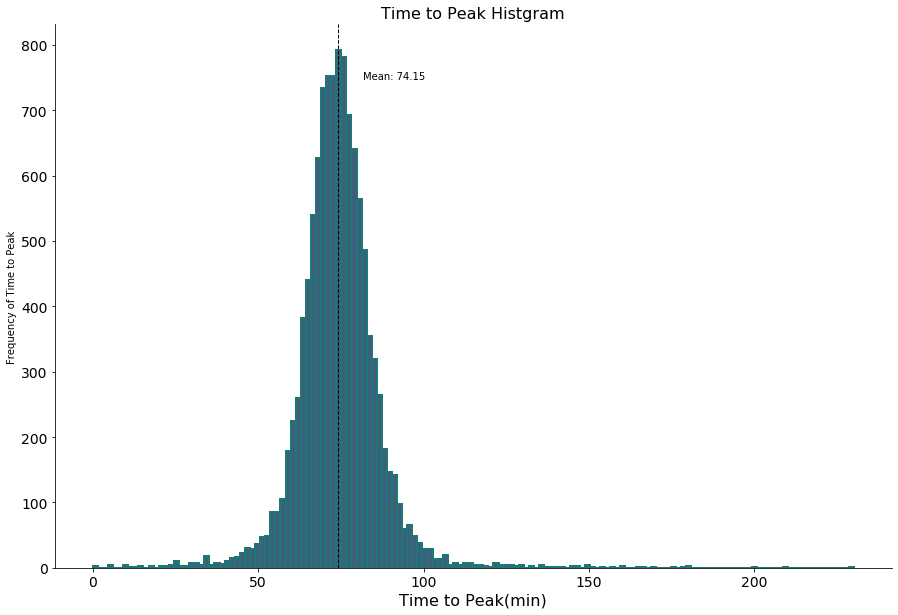

In [16]:
Days=time['start_to_peak']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Time to Peak Histgram', fontsize=16)
plt.xlabel('Time to Peak(min)', fontsize=16)
plt.ylabel('Frequency of Time to Peak');

**peak to end**

In [15]:
time['peak_to_end'].median()

89.49612403100772

In [19]:
time['peak_to_end'].std()

12.324618607441815

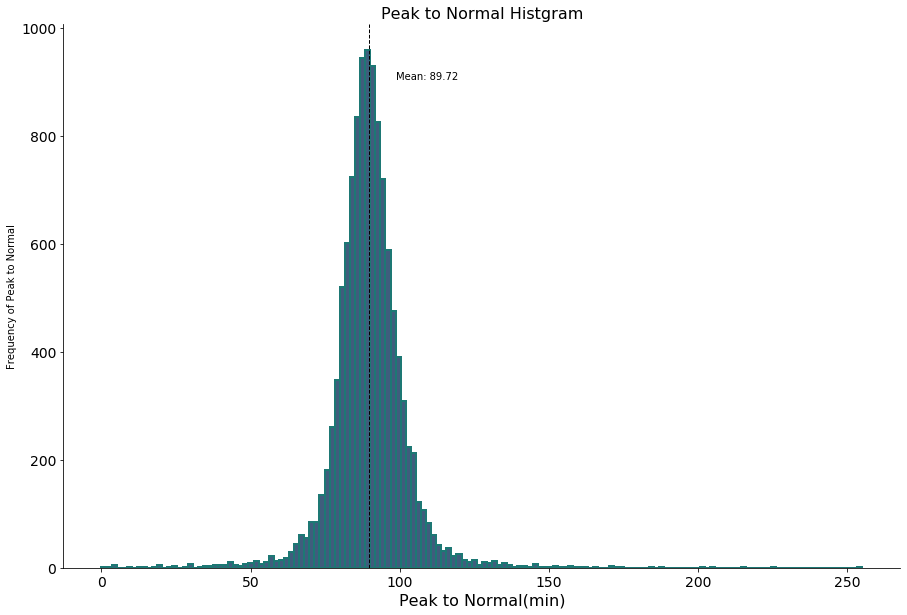

In [17]:
Days=time['peak_to_end']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Peak to Normal Histgram', fontsize=16)
plt.xlabel('Peak to Normal(min)', fontsize=16)
plt.ylabel('Frequency of Peak to Normal');

### Distribution of start_to_peak, peak_to_end per patient by midnight,morning,afternoon and night

In [35]:
sql_script="""
  (
  SELECT
    pim_id,
    'Sleep (0,6]' AS time_range,
    AVG(time_to_peak) AS start_to_peak,
    AVG(TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE)) AS peak_to_end
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=6
    AND EXTRACT(hour
    FROM
      start_datetime_local)>0
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Morning (6,12]' AS time_range,
    AVG(time_to_peak) AS start_to_peak,
    AVG(TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE)) AS peak_to_end
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=12
    AND EXTRACT(hour
    FROM
      start_datetime_local)>6
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Afternoon (12,18]' AS time_range,
    AVG(time_to_peak) AS start_to_peak,
    AVG(TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE)) AS peak_to_end
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=18
    AND EXTRACT(hour
    FROM
      start_datetime_local)>12
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Night (18,24]' AS time_range,
    AVG(time_to_peak) AS start_to_peak,
    AVG(TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE)) AS peak_to_end
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    (EXTRACT(hour
      FROM
        start_datetime_local)<=23
      AND EXTRACT(hour
      FROM
        start_datetime_local)>18)
    OR (EXTRACT(hour
      FROM
        start_datetime_local)=0)
  GROUP BY
    pim_id)
"""

In [36]:
period=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [37]:
period.shape

(44571, 4)

In [38]:
period.head()

,pim_id,time_range,start_to_peak,peak_to_end
0,1383361,"Night (18,24]",77.500000,61.363636
1,1264411,"Night (18,24]",77.250000,67.350000
2,119733,"Night (18,24]",90.459770,68.505747
3,227716,"Night (18,24]",91.866667,71.700000
4,93587,"Night (18,24]",134.000000,81.500000


In [39]:
period.time_range.value_counts()

Morning (6,12]       11255
Afternoon (12,18]    11226
Night (18,24]        11095
Sleep (0,6]          10995
Name: time_range, dtype: int64

Text(0, 0.5, 'Time To Peak (min)')

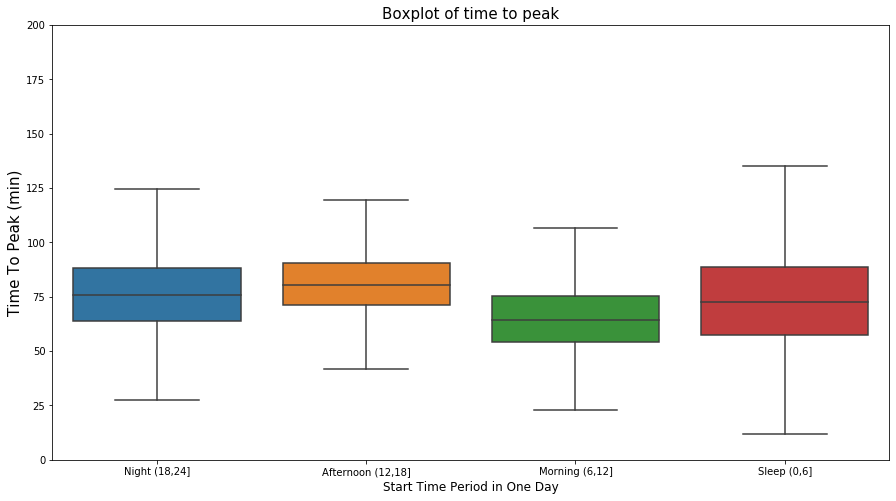

In [43]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="start_to_peak", data=period,showfliers=False)
fig.axis(ymin=0, ymax=200);
plt.title('Boxplot of time to peak', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('Time To Peak (min)',fontsize=15)

In [44]:
period.groupby('time_range')['start_to_peak'].mean()

time_range
Afternoon (12,18]    80.986807
Morning (6,12]       65.720109
Night (18,24]        76.619518
Sleep (0,6]          74.153319
Name: start_to_peak, dtype: float64

Text(0, 0.5, 'Peak to Normal')

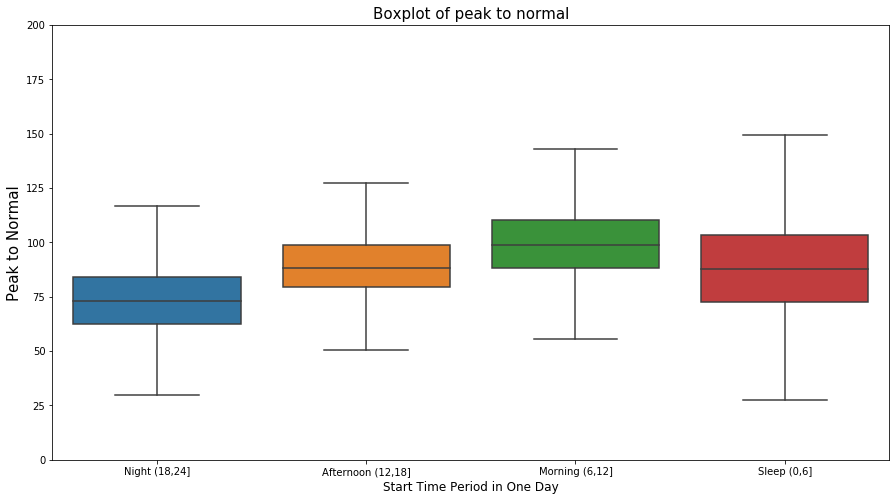

In [45]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="peak_to_end", data=period,showfliers=False)
fig.axis(ymin=0, ymax=200);
plt.title('Boxplot of peak to normal', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('Peak to Normal',fontsize=15)

In [47]:
period.groupby('time_range')['peak_to_end'].mean()

time_range
Afternoon (12,18]    89.146844
Morning (6,12]       99.673792
Night (18,24]        73.938906
Sleep (0,6]          89.041483
Name: peak_to_end, dtype: float64

### Distribution of peak_glucose

In [60]:
sql_script="""
SELECT
    pim_id,
    AVG(peak_glucose) AS peak_glucose
    from odp_level2_feature_store.meal_events
  GROUP BY
    pim_id
"""

In [61]:
peak=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [62]:
peak.head()

,pim_id,peak_glucose
0,1413158,167.204372
1,1257997,175.808333
2,1297439,224.676892
3,1259322,165.397138
4,1260453,313.451311


In [64]:
peak.peak_glucose.median()

199.2915254237288

In [65]:
peak.peak_glucose.std()

45.932905807057196

In [66]:
peak.peak_glucose.min()

96.68571428571428

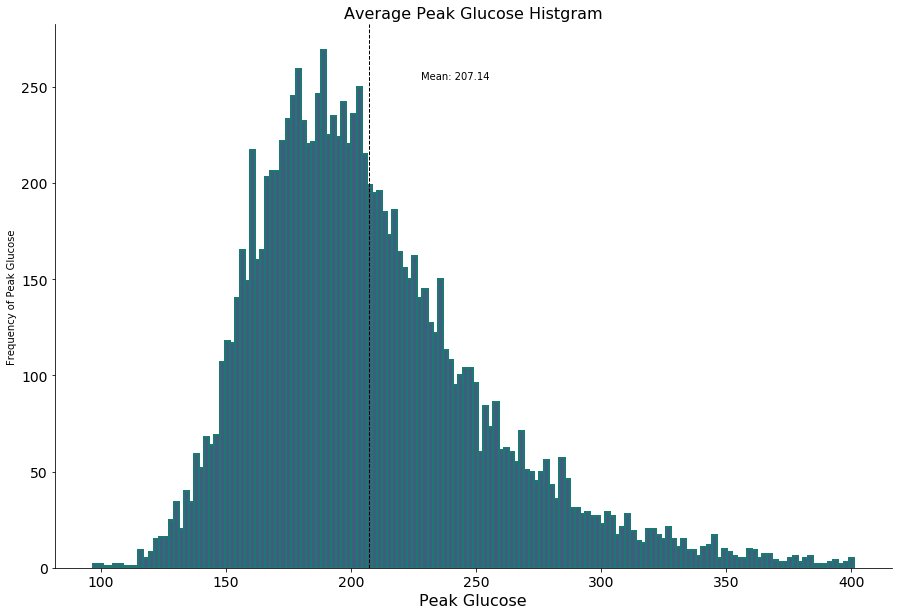

In [63]:
Days=peak['peak_glucose']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Average Peak Glucose Histgram', fontsize=16)
plt.xlabel('Peak Glucose', fontsize=16)
plt.ylabel('Frequency of Peak Glucose');

In [67]:
peak.shape

(11407, 2)

### Distribution of peak_glucose by time period

In [72]:
sql_script="""
  (
  SELECT
    pim_id,
    'Sleep (0,6]' AS time_range,
    AVG(peak_glucose) AS peak_glucose
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=6
    AND EXTRACT(hour
    FROM
      start_datetime_local)>0
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Morning (6,12]' AS time_range,
    AVG(peak_glucose) AS peak_glucose
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=12
    AND EXTRACT(hour
    FROM
      start_datetime_local)>6
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Afternoon (12,18]' AS time_range,
    AVG(peak_glucose) AS peak_glucose
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=18
    AND EXTRACT(hour
    FROM
      start_datetime_local)>12
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Night (18,24]' AS time_range,
    AVG(peak_glucose) AS peak_glucose
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    (EXTRACT(hour
      FROM
        start_datetime_local)<=23
      AND EXTRACT(hour
      FROM
        start_datetime_local)>18)
    OR (EXTRACT(hour
      FROM
        start_datetime_local)=0)
  GROUP BY
    pim_id)
"""

In [73]:
peak_time=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [74]:
peak_time.head()

,pim_id,time_range,peak_glucose
0,1261315,"Afternoon (12,18]",218.344910
1,115790,"Afternoon (12,18]",173.024752
2,208690,"Afternoon (12,18]",174.078182
3,186653,"Afternoon (12,18]",252.280303
4,10778595,"Afternoon (12,18]",187.600000


In [75]:
peak_time.groupby('time_range')['peak_glucose'].mean()

time_range
Afternoon (12,18]    206.025462
Morning (6,12]       206.958937
Night (18,24]        213.390979
Sleep (0,6]          196.261381
Name: peak_glucose, dtype: float64

Text(0, 0.5, 'average peak glucose')

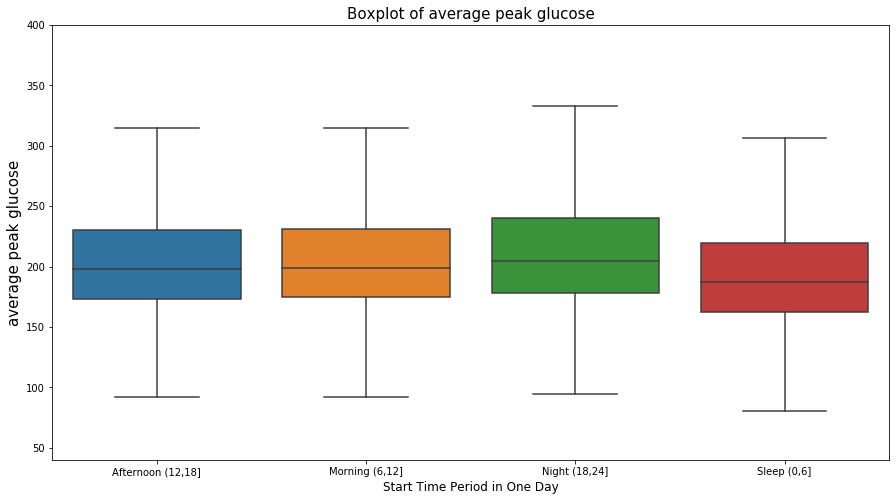

In [79]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="peak_glucose", data=peak_time,showfliers=False)
fig.axis(ymin=40, ymax=400);
plt.title('Boxplot of average peak glucose', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('average peak glucose',fontsize=15)

### Distribution of excursion_size

In [81]:
sql_script="""
SELECT
    pim_id,
    AVG(excursion_size) AS excursion_size
    from odp_level2_feature_store.meal_events
  GROUP BY
    pim_id
"""

In [82]:
excursion=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [83]:
excursion.head(3)

,pim_id,excursion_size
0,129964,36.268056
1,1277225,28.698475
2,1330625,48.761954


In [84]:
excursion.excursion_size.median()

46.1

In [85]:
excursion.excursion_size.std()

15.762763328135936

In [86]:
excursion.excursion_size.min()

0.0

In [87]:
excursion.excursion_size.max()

182.0

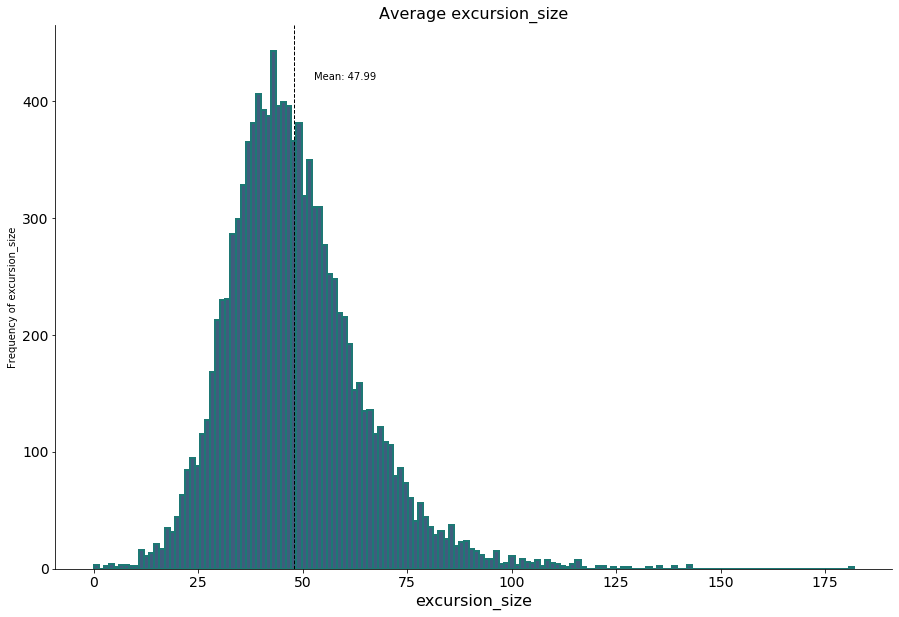

In [88]:
Days=excursion['excursion_size']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Average excursion_size', fontsize=16)
plt.xlabel('excursion_size', fontsize=16)
plt.ylabel('Frequency of excursion_size');

### Distribution of excursion_size by time period

In [89]:
sql_script="""
  (
  SELECT
    pim_id,
    'Sleep (0,6]' AS time_range,
    AVG(excursion_size) AS excursion_size
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=6
    AND EXTRACT(hour
    FROM
      start_datetime_local)>0
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Morning (6,12]' AS time_range,
    AVG(excursion_size) AS excursion_size
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=12
    AND EXTRACT(hour
    FROM
      start_datetime_local)>6
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Afternoon (12,18]' AS time_range,
    AVG(excursion_size) AS excursion_size
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=18
    AND EXTRACT(hour
    FROM
      start_datetime_local)>12
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Night (18,24]' AS time_range,
    AVG(excursion_size) AS excursion_size
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    (EXTRACT(hour
      FROM
        start_datetime_local)<=23
      AND EXTRACT(hour
      FROM
        start_datetime_local)>18)
    OR (EXTRACT(hour
      FROM
        start_datetime_local)=0)
  GROUP BY
    pim_id)
"""

In [90]:
excursion_time=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [91]:
excursion_time.head()

,pim_id,time_range,excursion_size
0,99225,"Night (18,24]",43.939024
1,1407706,"Night (18,24]",34.734146
2,2866165,"Night (18,24]",29.692308
3,1396444,"Night (18,24]",69.208333
4,1362651,"Night (18,24]",43.864662


In [92]:
excursion_time.groupby('time_range')['excursion_size'].mean()

time_range
Afternoon (12,18]    53.264102
Morning (6,12]       46.579328
Night (18,24]        50.646433
Sleep (0,6]          31.876346
Name: excursion_size, dtype: float64

Text(0, 0.5, 'average excursion_size')

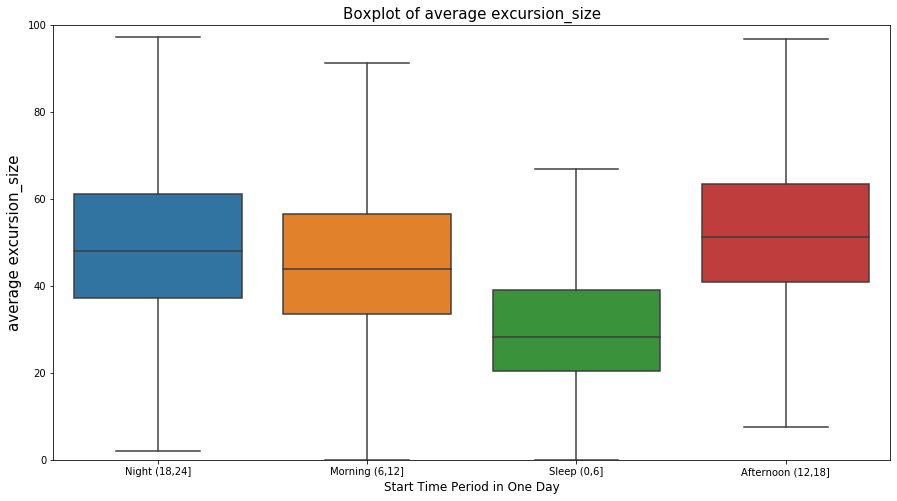

In [96]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="excursion_size", data=excursion_time,showfliers=False)
fig.axis(ymin=0, ymax=100);
plt.title('Boxplot of average excursion_size', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('average excursion_size',fontsize=15)

### Distribution of excursion rate by time period

In [97]:
sql_script="""
 (
  SELECT
    pim_id,
    'Sleep (0,6]' AS time_range,
    AVG(excursion_size/(time_to_peak+0.01)) AS excursion_rate
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=6
    AND EXTRACT(hour
    FROM
      start_datetime_local)>0
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Morning (6,12]' AS time_range,
    AVG(excursion_size/(time_to_peak+0.01)) AS excursion_rate
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=12
    AND EXTRACT(hour
    FROM
      start_datetime_local)>6
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Afternoon (12,18]' AS time_range,
    AVG(excursion_size/(time_to_peak+0.01)) AS excursion_rate
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=18
    AND EXTRACT(hour
    FROM
      start_datetime_local)>12
  GROUP BY
    pim_id)
UNION ALL (
  SELECT
    pim_id,
    'Night (18,24]' AS time_range,
    AVG(excursion_size/(time_to_peak+0.01)) AS excursion_rate
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    (EXTRACT(hour
      FROM
        start_datetime_local)<=23
      AND EXTRACT(hour
      FROM
        start_datetime_local)>18)
    OR (EXTRACT(hour
      FROM
        start_datetime_local)=0)
  GROUP BY
    pim_id)
"""

In [98]:
excursion_rate=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [99]:
excursion_rate.groupby('time_range')['excursion_rate'].mean()

time_range
Afternoon (12,18]    0.875143
Morning (6,12]       0.949415
Night (18,24]        0.841948
Sleep (0,6]          0.662603
Name: excursion_rate, dtype: float64

Text(0, 0.5, 'average excursion rate')

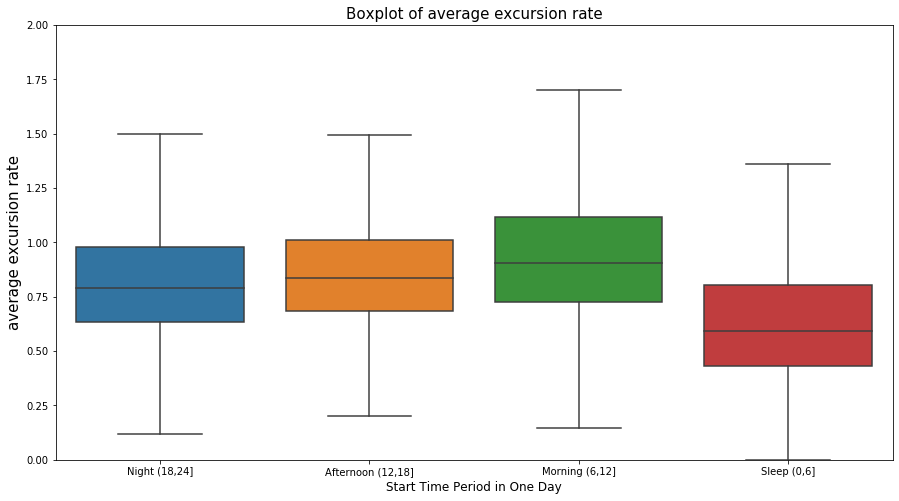

In [100]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="excursion_rate", data=excursion_rate,showfliers=False)
fig.axis(ymin=0, ymax=2);
plt.title('Boxplot of average excursion rate', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('average excursion rate',fontsize=15)